In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date
from sqlalchemy.ext.automap import automap_base as automap_base_HM
from sqlalchemy.ext.automap import automap_base as automap_base_HS
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Create an engine to database 
engine_HM = create_engine("sqlite:///cleaned_Hawaii_Measurements.sqlite")
engine_HS = create_engine("sqlite:///cleaned_Hawaii_Stations.sqlite")

In [3]:
conn_HM = engine_HM.connect()
conn_HS = engine_HS.connect()

In [4]:
#Reflecting into tables:
#Objects inheriting the automap base class
#If only one Base object calls the prepare method for two separate engines, then a SAWarning will be produced
#So we are instantializing two separate objects to workaround it.
Base_HM = automap_base_HM()
Base_HS = automap_base_HS()


#AutomapBase.prepare() method is called on the object to asking it to reflect the schema and produce mappings
Base_HM.prepare(engine_HM,reflect=True) 
Base_HS.prepare(engine_HS,reflect=True) 


In [11]:
Base_HS.classes.keys()
HM = Base_HM.classes.Measurement
HS = Base_HS.classes.Station

In [13]:
measurement = Base_HM.classes.keys()
station = Base_HS.classes.keys()

In [14]:
session_HM = Session(engine_HM)
session_HS = Session(engine_HS)

In [16]:
engine_HM.execute('SELECT date,prcp FROM Measurement WHERE date >= "2016-08-23"').fetchall()

In [17]:
date_prcp = engine_HM.execute('SELECT date,prcp FROM Measurement WHERE date >= "2016-08-23"').fetchall()
dates = []
prcps = []
for i in date_prcp:
    dates.append(i[0])
    prcps.append(i[1])

In [19]:
analysis_1 = pd.DataFrame({"Dates":dates,"Prcp":prcps})
analysis_1["Prcp"].fillna(value = 0)

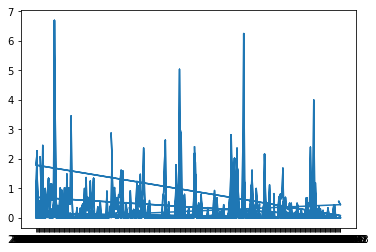

In [20]:
x = analysis_1["Dates"]
y = analysis_1["Prcp"]
plt.plot(x,y)
plt.show()

In [21]:
# qry = session.query(HM).filter(HM.date >= '2010-01-01').all()
# print(qry)

In [22]:
# qrys = session.query.\
#     filter(HM.date <= '2010-01-01').\
#         filter(HM.date >= '2011-01-01').all()
#     #group_by(Dow.stock).\
#     #order_by(Dow.stock).all()